In [2]:
# importare tutte le librerie necessarie
import pandas as pd
import numpy as np
import datetime as dt
from tabulate import tabulate
import matplotlib.pyplot as plt
path = r".\\DataSet\\"
import seaborn as sns
import statsmodels.api as sm

In [77]:
allMadrid = pd.read_csv(path+"out.csv")
allMadrid['date'] = pd.to_datetime(allMadrid['date'], format='%Y/%m/%d %H:%M:%S')
display(allMadrid)

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2008-06-01 01:00:00,NaN,0.47,NaN,NaN,11.820078,83.089996,16.990000,16.889999,10.4,8.98,NaN,NaN,28079001
1,2008-06-01 01:00:00,NaN,0.59,NaN,NaN,11.820078,94.820000,17.469999,19.040001,NaN,5.85,NaN,NaN,28079003
2,2008-06-01 01:00:00,NaN,0.55,NaN,NaN,11.820078,75.919998,13.470000,20.270000,NaN,6.95,NaN,NaN,28079004
3,2008-06-01 01:00:00,NaN,0.36,NaN,NaN,11.820078,61.029999,23.110001,10.850000,NaN,5.96,NaN,NaN,28079039
4,2008-06-01 01:00:00,1.68,0.80,1.7,0.3,11.820078,105.199997,12.120000,37.160000,21.9,10.92,1.53,6.67,28079006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190883,2018-02-01 00:00:00,NaN,0.50,NaN,NaN,66.000000,91.000000,1.000000,35.000000,22.0,NaN,NaN,NaN,28079056
2190884,2018-02-01 00:00:00,NaN,0.70,NaN,NaN,87.000000,107.000000,NaN,29.000000,NaN,15.00,NaN,NaN,28079057
2190885,2018-02-01 00:00:00,NaN,NaN,NaN,NaN,28.000000,48.000000,2.000000,NaN,NaN,NaN,NaN,NaN,28079058
2190886,2018-02-01 00:00:00,NaN,NaN,NaN,NaN,141.000000,103.000000,2.000000,NaN,NaN,NaN,NaN,NaN,28079059


In [87]:
no2Tab.index

DatetimeIndex(['2008-06-01 01:00:00', '2008-06-01 01:00:00',
               '2008-06-01 01:00:00', '2008-06-01 01:00:00',
               '2008-06-01 01:00:00', '2008-06-01 01:00:00',
               '2008-06-01 01:00:00', '2008-06-01 01:00:00',
               '2008-06-01 01:00:00', '2008-06-01 01:00:00',
               ...
               '2018-02-01 00:00:00', '2018-02-01 00:00:00',
               '2018-02-01 00:00:00', '2018-02-01 00:00:00',
               '2018-02-01 00:00:00', '2018-02-01 00:00:00',
               '2018-02-01 00:00:00', '2018-02-01 00:00:00',
               '2018-02-01 00:00:00', '2018-02-01 00:00:00'],
              dtype='datetime64[ns]', length=2190888, freq=None)

In [95]:
print(allMadrid['date'])

0         2008-06-01 01:00:00
1         2008-06-01 01:00:00
2         2008-06-01 01:00:00
3         2008-06-01 01:00:00
4         2008-06-01 01:00:00
                  ...        
2190883   2018-02-01 00:00:00
2190884   2018-02-01 00:00:00
2190885   2018-02-01 00:00:00
2190886   2018-02-01 00:00:00
2190887   2018-02-01 00:00:00
Name: date, Length: 2190888, dtype: datetime64[ns]


,NO2
date,
2008-06-01 01:00:00,NaN
2008-06-01 01:00:00,NaN
2008-06-01 01:00:00,NaN
2008-06-01 01:00:00,NaN
2008-06-01 01:00:00,NaN
...,...
2018-02-01 00:00:00,NaN
2018-02-01 00:00:00,NaN
2018-02-01 00:00:00,NaN


<AxesSubplot: xlabel='date'>

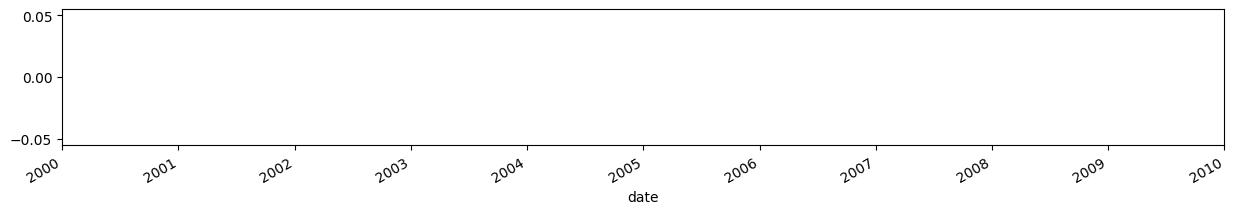

In [96]:
index = pd.DatetimeIndex(allMadrid['date'])
no2Tab=pd.DataFrame({'NO2':allMadrid['NO_2']},index=index)
display(no2Tab)
forNo2 = no2Tab['NO2']
forNo2.plot(figsize=(15, 2))

Ora creiamo il modello per le previsioni. 
Il modello scelto è un AR(1), e lo costruiremo grazie alla classe `SARIMAX` di statsmodels.
Poi stimiamo i suoi parametri con il metodo `fit`. 
Infine con il metodo `summary` produrremo le diverse tabelle che mostrano i risultati.

In [39]:
# Construct the model
mod = sm.tsa.SARIMAX(forNo2, order=(1, 0, 0), trend='c')
# Estimate the parameters
res = mod.fit()

print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                    NO2   No. Observations:                   11
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -40.382
Date:                Mon, 28 Nov 2022   AIC                             86.764
Time:                        17:45:27   BIC                             87.958
Sample:                             0   HQIC                            86.012
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     14.9604     11.783      1.270      0.204      -8.134      38.055
ar.L1          0.1206      0.715      0.169      0.866      -1.280       1.521
sigma2        90.2891     48.661      1.855      0.0

d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [46]:
# Here we construct a more complete results object.
fcast_res1 = res.get_forecast(steps=5)

# Most results are collected in the `summary_frame` attribute.
# Here we specify that we want a confidence level of 90%
print(fcast_res1.summary_frame(alpha=0.10))

NO2       mean   mean_se  mean_ci_lower  mean_ci_upper
11   17.973752  9.502056       2.344261      33.603243
12   17.127726  9.570885       1.385021      32.870432
13   17.025712  9.571882       1.281366      32.770057
14   17.013410  9.571897       1.269041      32.757780
15   17.011927  9.571897       1.267557      32.756297


d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


d:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


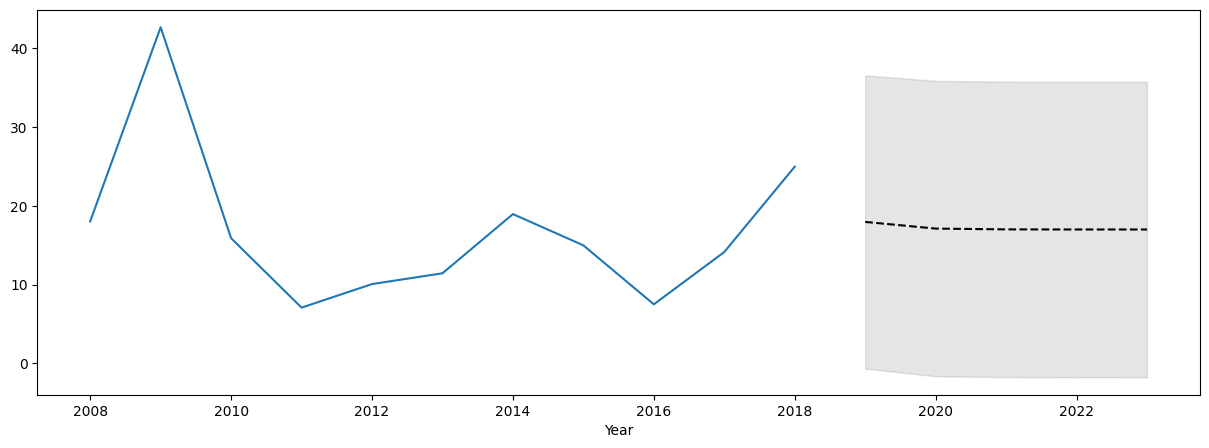

In [74]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
#forNo2.reset_index()
forNo2.loc[0:].plot(ax=ax)

# Construct the forecasts
fcast = res.get_forecast(steps=5).summary_frame()
fcast['mean'].index=fcast['mean'].index+2008
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index+2008, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1)

<AxesSubplot: >

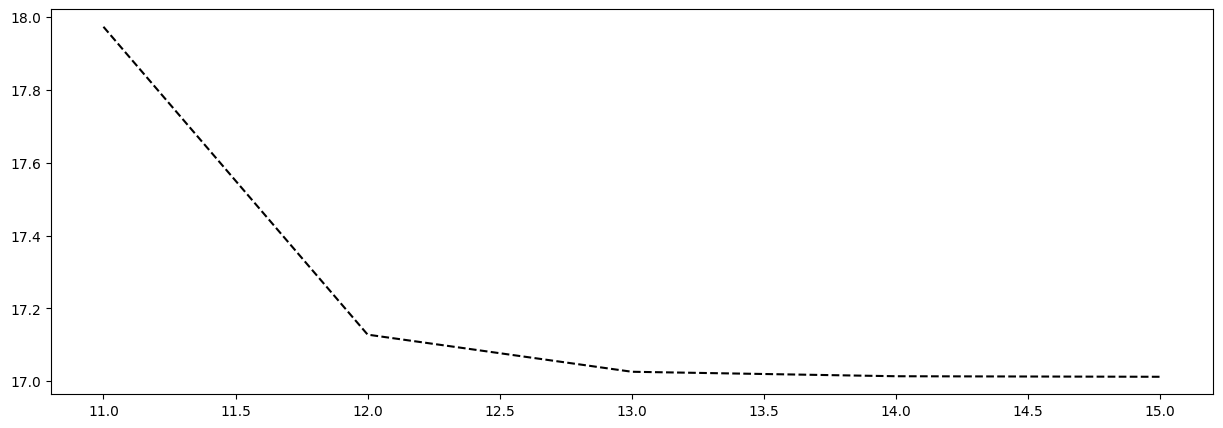

In [56]:
fig, ax = plt.subplots(figsize=(15, 5))
fcast['mean'].plot(ax=ax, style='k--')